In [31]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import IFrame
from folium.features import DivIcon

import json

print('Libraries imported.')

Libraries imported.


# Population Data

In [2]:
df = pd.read_html('https://de.wikipedia.org/wiki/Liste_der_Stadtteile_von_Frankfurt_am_Main',
                  decimal=',',
                  thousands='.',
                  flavor='bs4')[0]
df

,Nr.,Stadtteil,Fläche[3]in km²,Einwohner,Weiblich,Männlich,Deutsche,Ausländer,Ausländerin Prozent,Einwohnerje km²,Ortsbezirk,Stadtteilseit,Vorherige Zugehörigkeit
0,1,Altstadt,0.506,4151,2015,2136,2604,1547,37.3,8204,01 Innenstadt I,1866[Anm. 1],Freie Stadt Frankfurt
1,2,Innenstadt,1.491,6605,3088,3517,3514,3091,46.8,4430,01 Innenstadt I,1866[Anm. 2],Freie Stadt Frankfurt
2,3,Bahnhofsviertel,0.542,3561,1378,2183,1638,1923,54,6570,01 Innenstadt I,1866[Anm. 3],Freie Stadt Frankfurt
3,4,Westend-Süd,2.497,18822,9593,9229,13655,5167,27.5,7538,02 Innenstadt II,1866[Anm. 3],Freie Stadt Frankfurt
4,5,Westend-Nord,1.632,10198,5321,4877,7214,2984,29.3,6249,02 Innenstadt II,1866[Anm. 3],Freie Stadt Frankfurt
5,6,Nordend-West,3.100,30518,15625,14893,23744,6774,22.2,9845,03 Innenstadt III,1866[Anm. 3],Freie Stadt Frankfurt
6,7,Nordend-Ost,1.532,23028,11947,11081,17863,5165,22.4,15031,03 Innenstadt III,1866[Anm. 3],Freie Stadt Frankfurt
7,8,Ostend,5.564,29171,14980,14191,20802,8369,28.7,5243,04 Bornheim/Ostend,1866[Anm. 3],Freie Stadt Frankfurt
8,9,Bornheim,2.786,30533,16110,14423,23214,7319,24,10959,04 Bornheim/Ostend,1877,Stadtkreis Frankfurt am Main[Anm. 4]
9,10,Gutleutviertel,1.792,6924,3027,3897,3976,2948,42.6,3864,01 Innenstadt I,1866[Anm. 3],Freie Stadt Frankfurt


In [3]:
df.drop(["Nr.", "Vorherige Zugehörigkeit", "Ortsbezirk", "Stadtteilseit"], axis=1, inplace=True)
df.drop([46], inplace=True)

In [4]:
df.rename(columns={"Stadtteil": "District",
                   "Fläche[3]in km²": "Area in square km",
                   "Einwohner": "Inhabitants",
                   "Weiblich": "Female",
                   "Männlich": "Male",
                   "Deutsche": "Germans",
                   "Ausländer": "Foreigners",
                   "Ausländerin Prozent": "Foreigners in percent",
                   "Einwohnerje km²": "Inhabitants per square km",
                   "Ortsbezirk": "Area District"},
            inplace=True)
df.index += 1

In [5]:
df

,District,Area in square km,Inhabitants,Female,Male,Germans,Foreigners,Foreigners in percent,Inhabitants per square km
1,Altstadt,0.506,4151,2015,2136,2604,1547,37.3,8204
2,Innenstadt,1.491,6605,3088,3517,3514,3091,46.8,4430
3,Bahnhofsviertel,0.542,3561,1378,2183,1638,1923,54,6570
4,Westend-Süd,2.497,18822,9593,9229,13655,5167,27.5,7538
5,Westend-Nord,1.632,10198,5321,4877,7214,2984,29.3,6249
6,Nordend-West,3.100,30518,15625,14893,23744,6774,22.2,9845
7,Nordend-Ost,1.532,23028,11947,11081,17863,5165,22.4,15031
8,Ostend,5.564,29171,14980,14191,20802,8369,28.7,5243
9,Bornheim,2.786,30533,16110,14423,23214,7319,24,10959
10,Gutleutviertel,1.792,6924,3027,3897,3976,2948,42.6,3864


In [6]:
df.loc[15, "Inhabitants"] = df.loc[14, "Inhabitants"]
df.loc[15, "Female"] = df.loc[14, "Female"]
df.loc[15, "Male"] = df.loc[14, "Male"]
df.loc[15, "Germans"] = df.loc[14, "Germans"]
df.loc[15, "Foreigners"] = df.loc[14, "Foreigners"]
df.loc[15, "Foreigners in percent"] = df.loc[14, "Foreigners in percent"]
df.loc[15, "Inhabitants per square km"] = df.loc[14, "Inhabitants per square km"]

In [7]:
df

,District,Area in square km,Inhabitants,Female,Male,Germans,Foreigners,Foreigners in percent,Inhabitants per square km
1,Altstadt,0.506,4151,2015,2136,2604,1547,37.3,8204
2,Innenstadt,1.491,6605,3088,3517,3514,3091,46.8,4430
3,Bahnhofsviertel,0.542,3561,1378,2183,1638,1923,54,6570
4,Westend-Süd,2.497,18822,9593,9229,13655,5167,27.5,7538
5,Westend-Nord,1.632,10198,5321,4877,7214,2984,29.3,6249
6,Nordend-West,3.100,30518,15625,14893,23744,6774,22.2,9845
7,Nordend-Ost,1.532,23028,11947,11081,17863,5165,22.4,15031
8,Ostend,5.564,29171,14980,14191,20802,8369,28.7,5243
9,Bornheim,2.786,30533,16110,14423,23214,7319,24,10959
10,Gutleutviertel,1.792,6924,3027,3897,3976,2948,42.6,3864


In [8]:
df = df.astype({"Inhabitants": "int32",
           "Female": "int32",
           "Male": "int32",
           "Germans": "int32",
           "Foreigners": "int32",
           "Foreigners in percent": "float32",
           "Inhabitants per square km": "int32"})

In [397]:
#df.to_csv("./data/census_data.csv", encoding='utf-8', index=False)

In [32]:
df = pd.read_csv("./data/census_data.csv", encoding="utf-8")

In [399]:
df

,District,Area in square km,Inhabitants,Female,Male,Germans,Foreigners,Foreigners in percent,Inhabitants per square km,Longitude,Latitude
0,Altstadt,0.506,4151,2015,2136,2604,1547,37.3,8204,8.681539,50.110590
1,Innenstadt,1.491,6605,3088,3517,3514,3091,46.8,4430,8.682205,50.112817
2,Bahnhofsviertel,0.542,3561,1378,2183,1638,1923,54.0,6570,8.667658,50.107810
3,Westend-Süd,2.497,18822,9593,9229,13655,5167,27.5,7538,8.661165,50.117950
4,Westend-Nord,1.632,10198,5321,4877,7214,2984,29.3,6249,8.666019,50.129776
5,Nordend-West,3.100,30518,15625,14893,23744,6774,22.2,9845,8.685188,50.130401
6,Nordend-Ost,1.532,23028,11947,11081,17863,5165,22.4,15031,8.697659,50.127570
7,Ostend,5.564,29171,14980,14191,20802,8369,28.7,5243,8.721066,50.116220
8,Bornheim,2.786,30533,16110,14423,23214,7319,24.0,10959,8.711984,50.132859
9,Gutleutviertel,1.792,6924,3027,3897,3976,2948,42.6,3864,8.645433,50.097505


# Geodata

In [33]:
geodata_path = "./data/frankfurt.geojson"

In [34]:
with open(geodata_path) as json_file:
    geo_data = json.load(json_file)

In [11]:
def find_district_center(coordinates):
    min_long = 99
    min_lat = 99
    max_long = 0
    max_lat = 0
    
    for long, lat in coordinates:
        if long > max_long:
            max_long = long
        elif long < min_long:
            min_long = long
            
        if lat > max_lat:
            max_lat = lat
        elif lat < min_lat:
            min_lat = lat
                    
    center_long = min_long + ((max_long - min_long) / 2);
    center_lat = min_lat + ((max_lat - min_lat) / 2);
    
    return center_long, center_lat

In [12]:
for district in geo_data["features"]:
    name = district["properties"]["name"]
    shape_of_district = district["geometry"]["coordinates"][0][0]
    
    long, lat = find_district_center(shape_of_district)
    
    df.loc[df['District'] == name, "Longitude"] = long
    df.loc[df['District'] == name, "Latitude"] = lat


In [60]:
df

,District,Area in square km,Inhabitants,Female,Male,Germans,Foreigners,Foreigners in percent,Inhabitants per square km,Longitude,Latitude
0,Altstadt,0.506,4151,2015,2136,2604,1547,37.3,8204,8.681539,50.110590
1,Innenstadt,1.491,6605,3088,3517,3514,3091,46.8,4430,8.682205,50.112817
2,Bahnhofsviertel,0.542,3561,1378,2183,1638,1923,54.0,6570,8.667658,50.107810
3,Westend-Süd,2.497,18822,9593,9229,13655,5167,27.5,7538,8.661165,50.117950
4,Westend-Nord,1.632,10198,5321,4877,7214,2984,29.3,6249,8.666019,50.129776
5,Nordend-West,3.100,30518,15625,14893,23744,6774,22.2,9845,8.685188,50.130401
6,Nordend-Ost,1.532,23028,11947,11081,17863,5165,22.4,15031,8.697659,50.127570
7,Ostend,5.564,29171,14980,14191,20802,8369,28.7,5243,8.721066,50.116220
8,Bornheim,2.786,30533,16110,14423,23214,7319,24.0,10959,8.711984,50.132859
9,Gutleutviertel,1.792,6924,3027,3897,3976,2948,42.6,3864,8.645433,50.097505


In [15]:
latitude = 50.11552
longitude = 8.68417

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=11  # Limited levels of zoom for free Mapbox tiles.
)

folium.Choropleth(
    geo_data=geodata_path,
    name='choropleth',
    data=df,
    columns=['District', 'Inhabitants'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Population'
).add_to(m)

for index, row in df.iterrows():

    long = row["Longitude"]
    lat = row["Latitude"]
    html = '<div style="font-size: 12pt; color: black;">' + str(index) + '</div>'

    folium.Marker([lat, long], icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,20),
        html=html,
        )).add_to(m)
    
m

# Query Venues with Foursquare API

In [44]:
LIMIT = 500 # limit of number of venues returned by Foursquare API

radius = 3000 # define radius

cuisines = {"DE": "4bf58dd8d48988d10d941735",
            "TR": "4f04af1f2fb6e1c99f3db0bb",
            "IT": "4bf58dd8d48988d110941735",
            "GR": "4bf58dd8d48988d10e941735",
            "CN": "4bf58dd8d48988d145941735"}

In [43]:
results = {"DE" : [],
           "TR" : [],
           "IT" : [],
           "GR" : [],
           "CN" : []}

for cuisine_country, cuisine_api_id in cuisines.items():
    for index, row in df.iterrows():

        neighbourhood_longitude = row["Longitude"]
        neighbourhood_latitude = row["Latitude"]
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                neighbourhood_latitude, 
                neighbourhood_longitude, 
                radius, 
                LIMIT,
                cuisine_api_id)
        
        #results[cuisine_country].append(requests.get(url).json())

In [128]:
def create_dataframe(cuisine):
    venues = None
    
    for i, district in enumerate(results[cuisine]):
        if venues is not None:
            venues = venues.append(json_normalize(district['response']['groups'][0]['items']))
        else:
            venues = json_normalize(district['response']['groups'][0]['items'])
            
    venues = venues[['venue.name', 'venue.id', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']]
    venues.columns = ['Name', 'ID','Address', 'Lat', 'Lng']
    venues = venues.drop_duplicates()
    venues["Cuisine"] = cuisine
    
    return venues

all_venues = None

for cuisine in cuisines.keys():
    if all_venues is not None:
        all_venues = all_venues.append(create_dataframe(cuisine))
    else:
        all_venues = create_dataframe(cuisine)
        
all_venues.reset_index(drop=True, inplace=True)

In [63]:
#all_venues.to_csv("./data/all_venues.csv", encoding="utf-8", index=False)

In [65]:
all_venues = pd.read_csv("./data/all_venues.csv", encoding='utf-8')

In [66]:
all_venues

,Name,ID,Address,Lat,Lng,Cuisine,District
0,Paulaner am Dom,4be18ea74ed5c9b61ba1ccce,Domplatz 6,50.110876,8.685925,DE,Altstadt
1,Heimat – Essen und Weine,4cfd2a882c1aa090410e057a,Berliner Str. 70,50.111125,8.678286,DE,Altstadt
2,Römer Pils Brunnen,4b6ac454f964a52072df2be3,Töngesgasse 19,50.113450,8.683873,DE,Altstadt
3,Max on One,4e9dc4dff5b95ad93faa8788,Thurn-und-Taxis-Platz 2,50.115110,8.680233,DE,Innenstadt
4,Klosterhof,4b058851f964a52053be22e3,Weißfrauenstr. 3,50.109259,8.677224,DE,Altstadt
5,Zum Gemalten Haus,4b058851f964a52062be22e3,Schweizer Str. 67,50.100831,8.682157,DE,Sachsenhausen-Nord
6,Salzkammer,4c3e0c4783a3a593ef88ed33,Weißadlergasse 15,50.111557,8.678302,DE,Altstadt
7,Kanonesteppel,4bd33acd9854d13a863afd4d,Textorstr. 20,50.102597,8.688447,DE,Sachsenhausen-Nord
8,Die Leiter,4bb59bdff562ef3b61262f97,Kaiserhofstr. 11,50.115078,8.674752,DE,Innenstadt
9,Lokalbahnhof,4b2a822ef964a52087aa24e3,Darmstädter Landstr. 14,50.103075,8.690309,DE,Sachsenhausen-Nord


In [148]:
latitude = 50.11552
longitude = 8.68417
frankfurt_geo = geodata_path # geojson file

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=11  # Limited levels of zoom for free Mapbox tiles.
)


folium.GeoJson(
    geodata_path,
    name='geojson'
).add_to(m)

colors = {"DE": "red",
          "TR": "blue",
          "IT": "green",
          "GR": "purple",
          "CN": "orange"}
    
for index, row in all_venues.iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    label = row["Name"]
    color = colors[row["Cuisine"]]
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color=color,
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(m)

m

In [53]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

polygons = []
district_polygons = {}

for district in geo_data["features"]:
    district_name = district["properties"]["name"]
    
    shape_of_district = district["geometry"]["coordinates"][0][0]
    points = [(p[0], p[1]) for p in shape_of_district]
    district_polygon = Polygon(points)
    
    district_polygons[district_name] = district_polygon

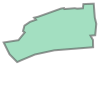

In [54]:
district_polygons["Altstadt"]

In [58]:
def is_within_borders(point, polygons):
    for name, polygon in district_polygons.items():
        if polygon.contains(point):
            return name
        
    return None

district_affilitations = []

for index, row in all_venues.iterrows():
    point = Point(row["Lng"], row["Lat"])
    district_affilitations.append(is_within_borders(point, district_polygons))

In [61]:
all_venues["District"] = district_affilitations

In [62]:
all_venues

,Name,ID,Address,Lat,Lng,Cuisine,District
0,Paulaner am Dom,4be18ea74ed5c9b61ba1ccce,Domplatz 6,50.110876,8.685925,DE,Altstadt
1,Heimat – Essen und Weine,4cfd2a882c1aa090410e057a,Berliner Str. 70,50.111125,8.678286,DE,Altstadt
2,Römer Pils Brunnen,4b6ac454f964a52072df2be3,Töngesgasse 19,50.113450,8.683873,DE,Altstadt
3,Max on One,4e9dc4dff5b95ad93faa8788,Thurn-und-Taxis-Platz 2,50.115110,8.680233,DE,Innenstadt
4,Klosterhof,4b058851f964a52053be22e3,Weißfrauenstr. 3,50.109259,8.677224,DE,Altstadt
5,Zum Gemalten Haus,4b058851f964a52062be22e3,Schweizer Str. 67,50.100831,8.682157,DE,Sachsenhausen-Nord
6,Salzkammer,4c3e0c4783a3a593ef88ed33,Weißadlergasse 15,50.111557,8.678302,DE,Altstadt
7,Kanonesteppel,4bd33acd9854d13a863afd4d,Textorstr. 20,50.102597,8.688447,DE,Sachsenhausen-Nord
8,Die Leiter,4bb59bdff562ef3b61262f97,Kaiserhofstr. 11,50.115078,8.674752,DE,Innenstadt
9,Lokalbahnhof,4b2a822ef964a52087aa24e3,Darmstädter Landstr. 14,50.103075,8.690309,DE,Sachsenhausen-Nord


In [67]:
latitude = 50.11552
longitude = 8.68417
frankfurt_geo = geodata_path # geojson file

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=11  # Limited levels of zoom for free Mapbox tiles.
)


folium.GeoJson(
    geodata_path,
    name='geojson'
).add_to(m)

colors = {"DE": "red",
          "TR": "blue",
          "IT": "green",
          "GR": "purple",
          "CN": "orange"}
    
for index, row in all_venues[keep_mask].iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    label = row["Name"]
    color = colors[row["Cuisine"]]
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color=color,
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(m)

m

# Get Venue Information with Foursquare API

In [68]:
CLIENT_ID = None # removed before publishing
CLIENT_SECRET = None # removed before publishing
VERSION = '20180605' # Foursquare API version

In [70]:
all_venue_details = []

for index, row in all_venues.iterrows():
    venue_id = row["ID"]
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
                venue_id,
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION 
                )
    #all_venue_details.append(requests.get(url).json())

In [356]:
venue_details_df = None

for venue in all_venue_details:
    if venue["meta"]["code"] == 200:
        info = json_normalize(venue['response']['venue'])

        if venue_details_df is not None:
            venue_details_df = venue_details_df.append(info)
        else:
            venue_details_df = info

In [357]:
venue_details_df = venue_details_df[["id", "likes.count", "listed.count", "photos.count", "price.tier", "rating", "ratingSignals", "tips.count"]]
venue_details_df.columns = ['ID', 'Likes','Listed', 'Photos', 'Price', 'Rating', 'Rating Signals', 'Tips']
final_venue_details_df = venue_details_df.reset_index(drop=True)

In [422]:
#venue_details.to_csv("./data/venue_details.csv", encoding="utf-8", index=False)

In [423]:
venue_details = pd.read_csv("./data/venue_details.csv", encoding="utf-8")

In [424]:
venue_details

,ID,Likes,Listed,Photos,Price,Rating,Rating Signals,Tips
0,4be18ea74ed5c9b61ba1ccce,293,260,425,2.0,8.5,433.0,97
1,4cfd2a882c1aa090410e057a,43,136,49,2.0,8.7,59.0,16
2,4b6ac454f964a52072df2be3,60,44,74,2.0,7.8,99.0,25
3,4e9dc4dff5b95ad93faa8788,16,14,44,2.0,8.6,17.0,3
4,4b058851f964a52053be22e3,109,127,147,2.0,7.8,169.0,42
5,4b058851f964a52062be22e3,118,168,191,2.0,8.4,164.0,42
6,4c3e0c4783a3a593ef88ed33,82,94,87,NaN,8.1,128.0,36
7,4bd33acd9854d13a863afd4d,99,136,81,2.0,8.3,136.0,36
8,4bb59bdff562ef3b61262f97,13,17,16,2.0,8.4,18.0,5
9,4b2a822ef964a52087aa24e3,201,207,120,2.0,8.2,282.0,66


In [426]:
#len(all_venues.ID.unique())
# check duplicates
all_venues[all_venues.duplicated(['ID'], keep=False)]

,Name,ID,Address,Lat,Lng,Cuisine
48,Café Karin,4b05884ef964a5205cbd22e3,Großer Hirschgraben 28,50.111621,8.678097,DE
74,Zimt & Koriander,4cab661a97c8a1cdadfd9aa5,Schärfengäßchen 4,50.113324,8.681757,DE
102,Café Diesseits,4b05884df964a52031bd22e3,Konrad-Broßwitz-Str. 1,50.124916,8.639161,DE
105,Hamsilos & Schenck's,4dd235961f6ef5f6cccf0f06,Münchner Str. 28,50.107699,8.669168,DE
126,Ristorante La Divina,4b8ec035f964a520e13433e3,Feldbergstrasse,50.122028,8.661553,DE
127,La Tagliatella,522b2439498e04925e190c93,Europa-Allee 6,50.110356,8.651674,DE
132,Lilium,4b7984c1f964a52062fe2ee3,Leipzigerstr. 4,50.120673,8.649915,DE
177,Rusticale,4ba133b8f964a5209da137e3,Thudichumstr. 1a,50.123983,8.610235,DE
241,Hamsilos & Schenck's,4dd235961f6ef5f6cccf0f06,Münchner Str. 28,50.107699,8.669168,TR
251,Dorade am Main,4b1e51c2f964a520b41824e3,Dorade am Main Carl-von-Noorden Platz 5,50.097209,8.664123,TR
